<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Spaceship-Titanic/modeling_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [190]:
def fillna(df):
    df['VIP'].fillna(False, inplace=True)
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
    df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
    df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
    df['Spa'].fillna(df['Spa'].mean(), inplace=True)
    df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)
    df['CryoSleep'].fillna(False, inplace=True)
    return df

def drop(df):
    df.drop(['Name', 'PassengerId'], axis=1, inplace=True)
    return df

def encoding(df):
    df['Cabin'].fillna('F', inplace=True)
    df['HomePlanet'] = df['HomePlanet'].fillna('N')
    df['HomePlanet'] = df['Destination'].fillna('TRAPPIST-1e')
    features = ['Cabin', 'HomePlanet', 'Destination']
    for feature in features:
        df = pd.get_dummies(df, columns=[feature]).copy()

    features = ['CryoSleep', 'VIP']
    for feature in features:
        df[feature].apply(lambda x : int(x) if not pd.isna(x) else x)

    return df

def preprocessing(df):
    df['Cabin'] = df['Cabin'].str[:1]
    df = encoding(df)
    df = fillna(df)
    df = drop(df)
    return df

p_train = preprocessing(train)

**생각**
- 출발, 도착 행성 종류가 각각 3개밖에 없으니 이걸 분류 문제로 해결하고 갈지, fillna로 그냥 'N'으로 채울것인지
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck같은 서비스 지불 금액과 같은 피처들은 대부분 분포가 0으로 치우쳐저 있어서 그렇게 효과가 있을것 같지는 않음

In [154]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for service in services:
    ratio_0 = len(train[train[service]<10]) / len(train)
    print(ratio_0)

0.6900954791211319
0.6777867249511101
0.7003336017485333
0.6729552513516622
0.6872196019786034


In [155]:
train.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<Axes: >

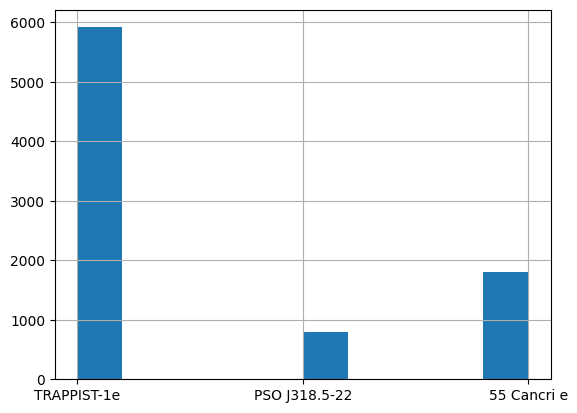

In [156]:
train.Destination.hist()

<Axes: >

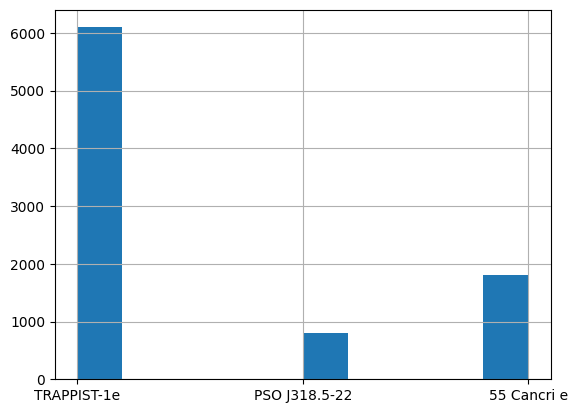

In [157]:
train['HomePlanet'].hist()

In [191]:
from pandas.io.xml import preprocess_data
from sklearn.ensemble import RandomForestClassifier

X = p_train.drop('Transported', axis=1, inplace=False)
y = p_train['Transported']

clf = RandomForestClassifier(n_estimators=1000, random_state=2023, n_jobs=-1)
clf.fit(X, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=2023)

In [192]:
p_test = preprocessing(test)
p_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,HomePlanet_55 Cancri e,HomePlanet_PSO J318.5-22,HomePlanet_TRAPPIST-1e,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
4273,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,0,0,...,0,1,0,0,0,0,1,0,0,1
4274,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,1,0,0
4275,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [193]:
pred = clf.predict(p_test)

In [194]:
ss = pd.read_csv('sample_submission.csv')

In [195]:
ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [196]:
sub_file = pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':pred})
sub_file.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [198]:
sub_file.to_csv('submission.csv', index=False)

## 결과 : 0.78536